<div style="border:solid steelblue 1px; padding: 20px">
<b>Описание данных:</b> <br />
Name — название игры <br />
Platform — платформа <br />
Year_of_Release — год выпуска <br />
Genre — жанр игры <br />
NA_sales — продажи в Северной Америке (миллионы проданных копий) <br />
EU_sales — продажи в Европе (миллионы проданных копий) <br />
JP_sales — продажи в Японии (миллионы проданных копий) <br />
Other_sales — продажи в других странах (миллионы проданных копий) <br />
Global_Sales— суммарные продажи (миллионы проданных копий)<br />
Critic_Score — оценка критиков (максимум 100) <br />
User_Score — оценка пользователей (максимум 10) <br />
Critic_Count, User_Count— количество оценок критиков и пользователей(соответсвенно)<br />
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. <br />


## ВВЕДЕНИЕ

<div style="border:solid steelblue 1px; padding: 20px">
Целью данного исследования является выявление определяющих успешность игр закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br /> 
 <br /> 
Входные данные - данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\DAN\Desktop\video_game\Videogame_Sales.csv', encoding = 'cp1251')

In [4]:
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.0,80.0,8.4,595.0,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN


<div style="border:solid steelblue 1px; padding: 20px">
Приведем название столбцов к единому стилю:

In [5]:
df=df.rename(columns={'Name':'name','Platform':'platform', 'Year_of_Release':'year_of_release',
                     'Genre':'genre','NA_Sales':'na_sales','EU_Sales':'eu_sales','JP_Sales':'jp_sales',
                     'Other_Sales':'other_sales','Global_Sales':'global_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating',
                     'Critic_Count':'critic_count','User_Count':'user_count'})
display(df.head())

,name,platform,year_of_release,genre,Publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


<div style="border:solid steelblue 1px; padding: 20px">
Проверим на дубликаты:

In [6]:
df.duplicated().sum()

0

<div style="border:solid steelblue 1px; padding: 20px">
Приведем первичный анализ:

In [7]:
count_row=df.shape[0]

rating1=df['rating'].unique()

print(f'рейтинг от организации ESRB: {rating1}')
print()
print(f'Размер дата-сета составляет {count_row}')  
print()
for i in df.columns:
        if df[i].isna().sum() > 0:
           count_na= df[i].isna().sum()
           print(f'в столбце {i} находится {count_na} пропусков, что составляет {count_na/count_row :.2%} от всех значений')

рейтинг от организации ESRB: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

Размер дата-сета составляет 17416

в столбце year_of_release находится 8 пропусков, что составляет 0.05% от всех значений
в столбце Publisher находится 1 пропусков, что составляет 0.01% от всех значений
в столбце critic_score находится 9080 пропусков, что составляет 52.14% от всех значений
в столбце critic_count находится 9080 пропусков, что составляет 52.14% от всех значений
в столбце user_score находится 9618 пропусков, что составляет 55.23% от всех значений
в столбце user_count находится 9618 пропусков, что составляет 55.23% от всех значений
в столбце rating находится 7164 пропусков, что составляет 41.13% от всех значений


<div style="border:solid steelblue 1px; padding: 20px">
В полученных данных наблюдаются пропуски (результаты первичного анализа см выше), которые мы последовательно рассмотрим далее <br /> 
Название столбцов было приведено к общему стилю<br /> 


## ПОДГОТОВКА ДАННЫХ

<div style="border:solid steelblue 1px; padding: 20px">
 После первично анализа предлагается:<br />
 * Удалены строки с пропуском года выпуска (т.к. их меньше 1%). Значение переведено в целочисленное значение<br />
 Т.к. замена оценок на медиану даже внутри платформы искажает картину, то:  <br /> 
 * в оценках (пользователей и критиков) и их количестве пропуски заменены на -1 (в анализе будут исключены).<br />
 * значения переведены в численное и целочисленное значение соответственно. <br />
 * В количественном параметре пропуски заменим на NOT!, что бы не упустить игры без рейтинга.<br />
<br /> 
Почему появились пропуски:<br />
    1) Механическая ошибка/сбой ситемы<br />
    2) Данных чисто физически нет. Напимер: очень старая игра, или не было опросов относительно неё<br />
    3) Рейтинг выставляет американская служба и она не смогла/не было необходимости проанализировать игру<br />

<div style="border:solid steelblue 1px; padding: 20px">
Причина отказа от замены медианными/средними значениями:<br />
игравая индустрия очень динамично развивающийся сектор бизнеса и горизонт планирования достаточно короткий.<br /> Похожую картину можно наблюдать например в автобизнесе. Данные с пропусками в цене для машин в 2005-2007 года нельзя заполнить их средними основываясь на данных 2020-2021.

In [8]:
#1-------------------------------------------------
print('year_of_release')
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release']=df['year_of_release'].astype('int')
null1=df['name'].isna().sum()
print(f'пустых значений в year_of_release : {null1}')
#1-------------------------------------------------
#2-------------------------------------------------
print('critic_score')
df['critic_score']=df['critic_score'].fillna(-1)
df['critic_score']=df['critic_score'].astype('int')
null1=df['critic_score'].isna().sum()
print(f'пустых значений в critic_score : {null1}')
#2-------------------------------------------------
#3-------------------------------------------------
print('user_score')
df['user_score']=df['user_score'].fillna(-1)
df['user_score']=pd.to_numeric(df['user_score'], errors='ignore')
null1=df['user_score'].isna().sum()
print(f'пустых значений в user_score : {null1}')
#3------------------------------------------------
#4------------------------------------------------
print('critic_count')
df['critic_count']=df['critic_count'].fillna(-1)
df['critic_count']=df['critic_count'].astype('int')
null1=df['critic_score'].isna().sum()
print(f'пустых значений в critic_count : {null1}')
#4------------------------------------------------
#5------------------------------------------------
print('user_count')
df['user_count']=df['user_count'].fillna(-1)
df['user_count']=df['user_count'].astype('int')
null1=df['critic_score'].isna().sum()
print(f'пустых значений в user_count : {null1}')
#5------------------------------------------------
#6------------------------------------------------
print('rating')
df['rating']=df['rating'].fillna('NOT!')
null1=df['critic_score'].isna().sum()
print(f'пустых значений в genre : {null1}')
print()
#6------------------------------------------------

year_of_release
пустых значений в year_of_release : 0
critic_score
пустых значений в critic_score : 0
user_score
пустых значений в user_score : 0
critic_count
пустых значений в critic_count : 0
user_count
пустых значений в user_count : 0
rating
пустых значений в genre : 0



## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

### АНАЛИЗ ВСЕЙ БАЗЫ ДАННЫХ

<div style="border:solid steelblue 1px; padding: 20px">
Посмотрим сколько игр выпускалось в разные годы

,count
year_of_release,
2009,1550
2008,1536
2010,1331
2007,1262
2011,1215


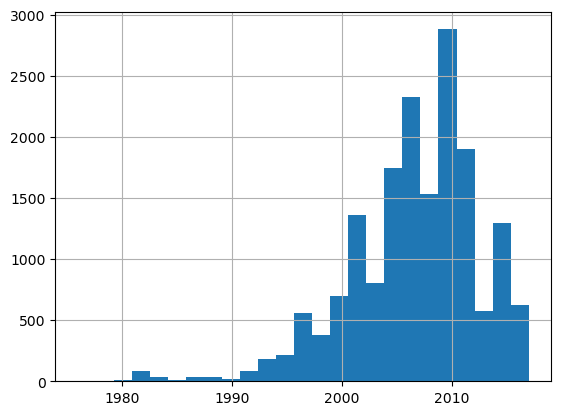

In [9]:
sales_year=df.groupby(by=['year_of_release'])['name'].agg(['count'])
display(sales_year.sort_values(by='count',ascending=False).head())
df['year_of_release'].hist(bins=25)
plt.show()

<div style="border:solid steelblue 1px; padding: 20px">
Число продаж резко увеличилось начиная где-то с 2003 года. Максимальное число продаж пришлось на 2007 год.

<div style="border:solid steelblue 1px; padding: 20px">
Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.   

In [10]:
df_platform=df.groupby(by=['platform'])['global_sales'].agg(['sum']).sort_values(by='sum', ascending=False)
display(df_platform.head())

,sum
platform,
PS2,1256.09
X360,975.43
PS3,943.29
Wii,910.14
DS,808.82


 гистограмма(суммамраня выручка по годам) для платформы PS2


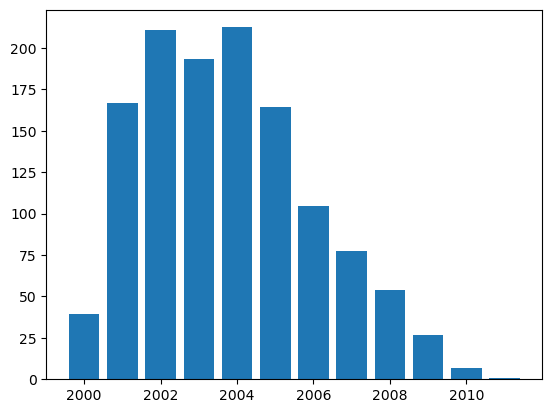

 гистограмма(суммамраня выручка по годам) для платформы X360


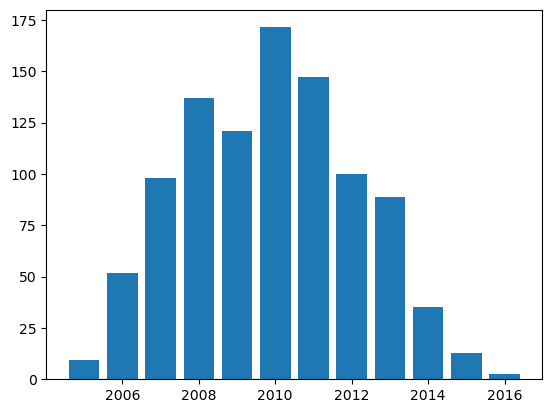

 гистограмма(суммамраня выручка по годам) для платформы PS3


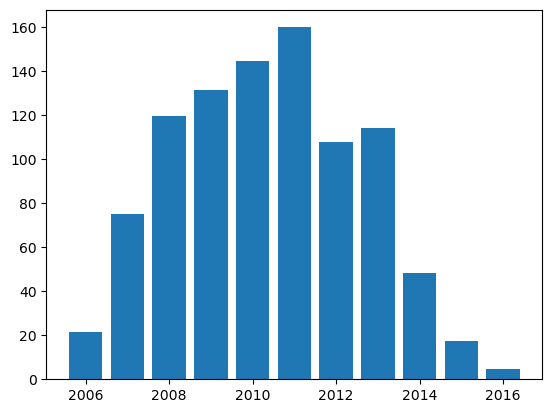

 гистограмма(суммамраня выручка по годам) для платформы Wii


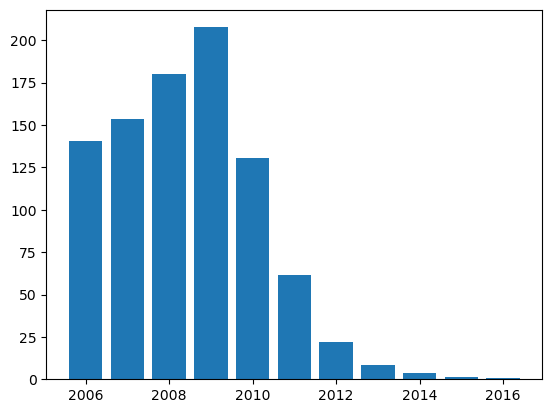

 гистограмма(суммамраня выручка по годам) для платформы DS


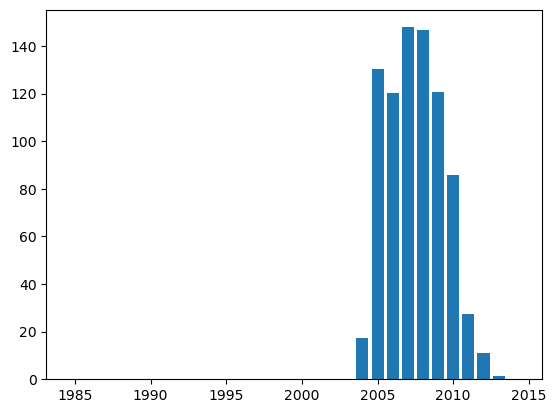

In [11]:
for i in range(5):
    name=df_platform.index[i]
    print(f' гистограмма(суммамраня выручка по годам) для платформы {name}')
    temp=df.query('platform == @name').groupby(by=['year_of_release'])['global_sales'].agg(['sum'])
    plt.bar(temp.index,temp['sum'])
    plt.show()

<div style="border:solid steelblue 1px; padding: 20px">
Средний срок жизни платформы где то 10-11 лет. Пик продаж приходится примерно на середину цикла жизни платформы. Анализируемая индустрия быстро развивается поэтому возьмем актуальный период в 3 года.<br /> 
 Далее будем проводить анализ только для актуального периода.

###  АНАЛИЗ ДАННЫХ АКТУАЛЬНОГО ПЕРИОДА

In [12]:
df_actual=df.query('year_of_release>=2014').reset_index(drop=True)
display(df_actual.head())

,name,platform,year_of_release,genre,Publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.08,5.95,0.36,2.41,14.80,-1,-1,-1.0,-1,NOT!
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,4.12,6.77,0.39,2.08,13.36,97,66,8.3,2955,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.45,3.64,3.10,0.76,11.95,-1,-1,-1.0,-1,NOT!
3,Pokemon Sun/Moon,3DS,2016,Role-Playing,Nintendo,5.01,2.74,2.88,0.77,11.40,-1,-1,-1.0,-1,NOT!
4,FIFA 17,PS4,2016,Sports,Electronic Arts,0.90,6.75,0.09,1.33,9.07,85,41,4.9,442,E


#### ПЛАТФОРМЫ И ПРОДАЖИ

<div style="border:solid steelblue 1px; padding: 20px">
Проанализируем платформы за актуальный период:

In [13]:
df_platform_actual=df_actual.groupby(by=['platform'])['global_sales'].agg(['sum']).sort_values(by='sum', ascending=False)
print('Лидеры продаж:')
display(df_platform_actual.head())

Лидеры продаж:


,sum
platform,
PS4,314.74
XOne,154.70
3DS,96.00
PS3,70.50
X360,50.30


 гистограмма(суммамраня выручка по годам) для платформы PS4


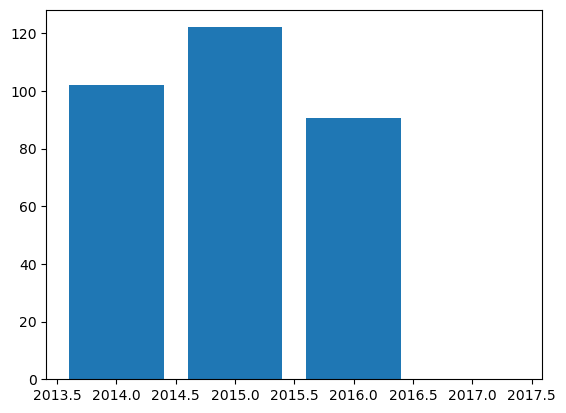

 гистограмма(суммамраня выручка по годам) для платформы XOne


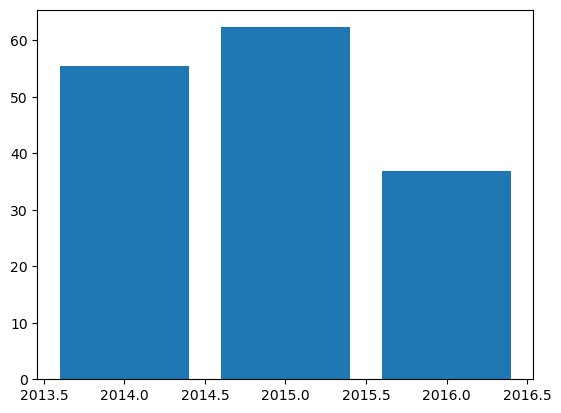

 гистограмма(суммамраня выручка по годам) для платформы 3DS


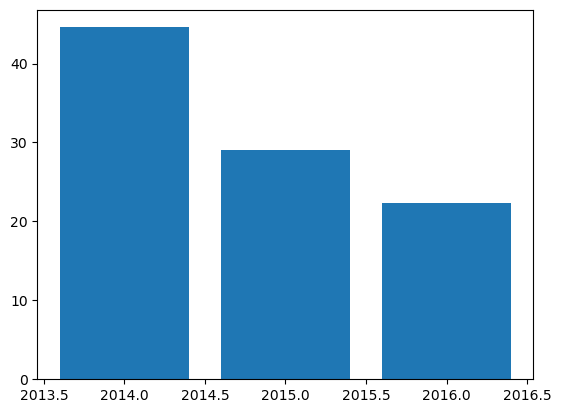

 гистограмма(суммамраня выручка по годам) для платформы PS3


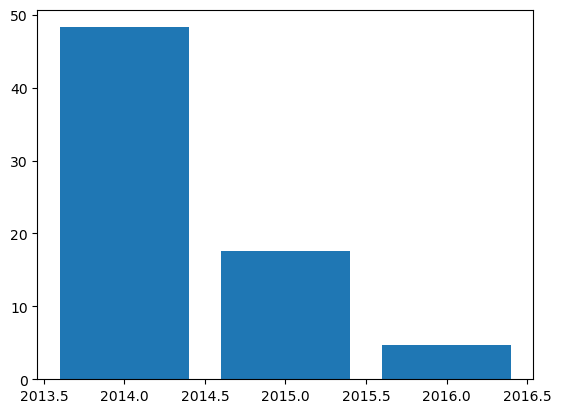

 гистограмма(суммамраня выручка по годам) для платформы X360


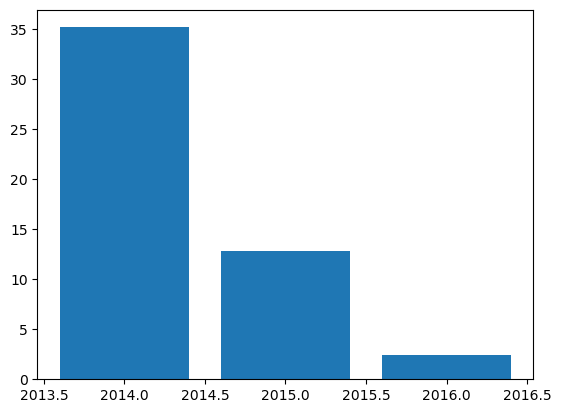

 гистограмма(суммамраня выручка по годам) для платформы WiiU


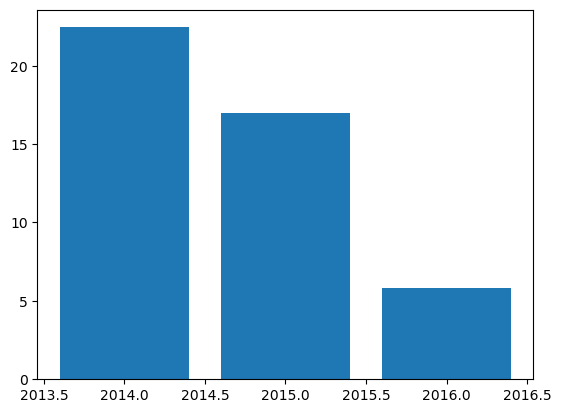

 гистограмма(суммамраня выручка по годам) для платформы PC


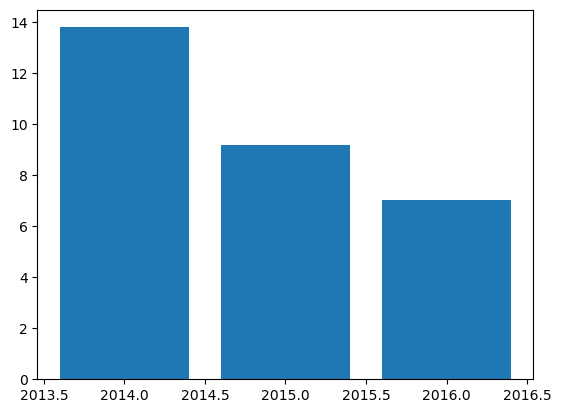

 гистограмма(суммамраня выручка по годам) для платформы PSV


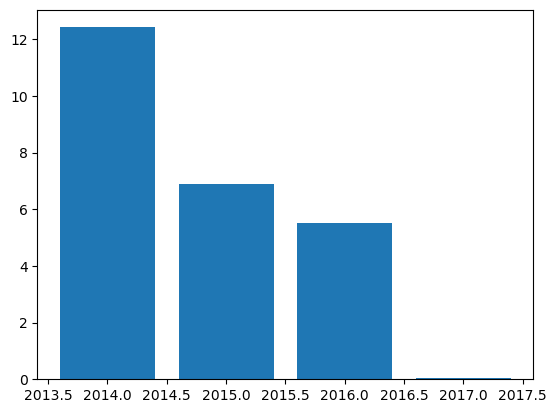

 гистограмма(суммамраня выручка по годам) для платформы Wii


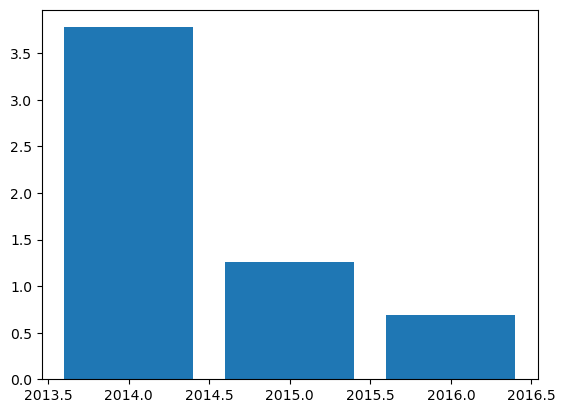

 гистограмма(суммамраня выручка по годам) для платформы PSP


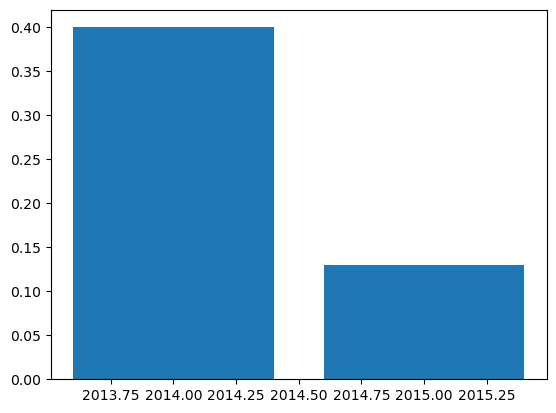

 гистограмма(суммамраня выручка по годам) для платформы DS


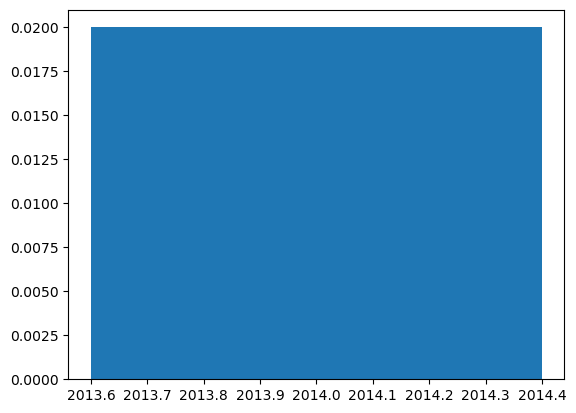

In [14]:
for i in range(len(df_platform_actual)):
    name=df_platform_actual.index[i]
    print(f' гистограмма(суммамраня выручка по годам) для платформы {name}')
    temp=df_actual.query('platform == @name').groupby(by=['year_of_release'])['global_sales'].agg(['sum'])
    plt.bar(temp.index,temp['sum'])
    plt.show()

<div style="border:solid steelblue 1px; padding: 20px">
По продажам лидируют платформы PS4, XOne, 3DS. Платформы такие как PS4 и XOne растут и потенциально прибыльные. Продажи по таким платформам как PC,Wii,PS3,X360,PSV  и т.д. убывают

<div style="border:solid steelblue 1px; padding: 20px">
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

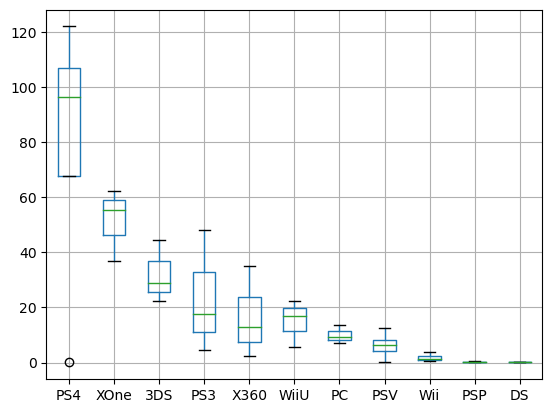

,PS4,XOne,3DS,PS3,X360,WiiU,PC,PSV,Wii,PSP,DS
year_of_release,,,,,,,,,,,
2014,102.05,55.44,44.59,48.27,35.15,22.45,13.81,12.42,3.78,0.40,0.02
2015,122.10,62.34,29.06,17.57,12.76,16.97,9.18,6.90,1.26,0.13,NaN
2016,90.55,36.92,22.35,4.66,2.39,5.79,7.05,5.53,0.69,NaN,NaN
2017,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN


In [15]:
name_index=[]
temp= pd.DataFrame()
for i in range(len(df_platform_actual)):
    name=df_platform_actual.index[i]
    name_index.append(name)
    temp[name]=df_actual.query('platform == @name').groupby(by=['year_of_release'])['global_sales'].agg(['sum'])['sum']
    temp
temp.boxplot(column=name_index)
plt.show()
display(temp)

<div style="border:solid steelblue 1px; padding: 20px">
Исходя из полученных данных (значения медианы и "усов") видно насколько прибыльна та или иная платформа за актуальный период.<br /> Лидирующее местно с большим отрывом занимает PS4.

####  ОЦЕНКИ, ЖАНРЫ И ПРОДАЖИ

<div style="border:solid steelblue 1px; padding: 20px">
Посмотрим на общее распределение игр по жанрам. В качестве метрики будем использовать медиану т.к. это поможет игнорировать выбросы

In [16]:
df_actual_genre=df_actual.groupby(by=['genre'])['global_sales'].agg(['median']).sort_values(by='median', ascending=False)
display(df_actual_genre)

,median
genre,
Shooter,0.530
Sports,0.205
Platform,0.155
Fighting,0.110
Role-Playing,0.110
Racing,0.090
Action,0.070
Misc,0.070
Simulation,0.055


<div style="border:solid steelblue 1px; padding: 20px">
Посмотрим, как влияют на продажи внутри платформы PS3 отзывы пользователей и критиков. 

0.4690296616372354
-0.16015518841924006


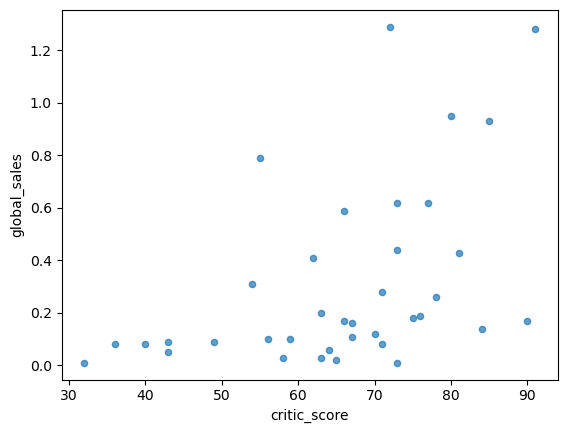

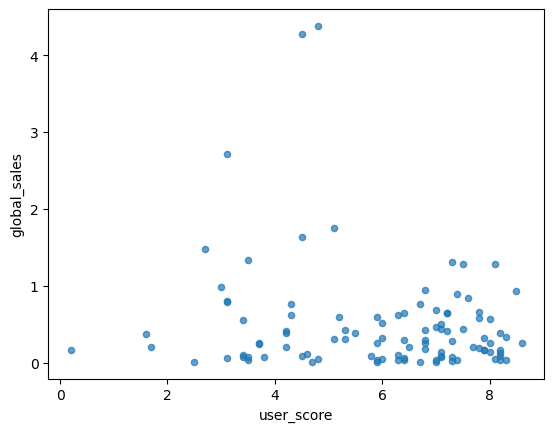

In [17]:
df_PS3_critic=df_actual.query('(platform == "PS3") & (critic_score != -1)')
df_PS3_user=df_actual.query('(platform == "PS3") & (user_score != -1)')

df_PS3_critic.plot(x='critic_score', y='global_sales', kind='scatter', alpha=0.7)
print(df_PS3_critic['global_sales'].corr(df_PS3_critic['critic_score']))

df_PS3_user.plot(x='user_score', y='global_sales', kind='scatter', alpha=0.7)
print(df_PS3_user['global_sales'].corr(df_PS3_user['user_score']))

<div style="border:solid steelblue 1px; padding: 20px">
В результате были установлено, что: <br />
1) Оценки критиков демонстрируют прямую, слабую корреляцию с продажами.<br />
2) Оценки пользователей демонстрируют обратную, очень слабую корреляцию с продажами т.е. оценки пользователей корреляции с продажами практически не имеют<br />

<div style="border:solid steelblue 1px; padding: 20px">
Посмотрим, как влияют на продажи отзывы пользователей и критиков на PS4 и XOne в актуальном интервале:<br />

0.40145918003935277
-0.030108912168491056


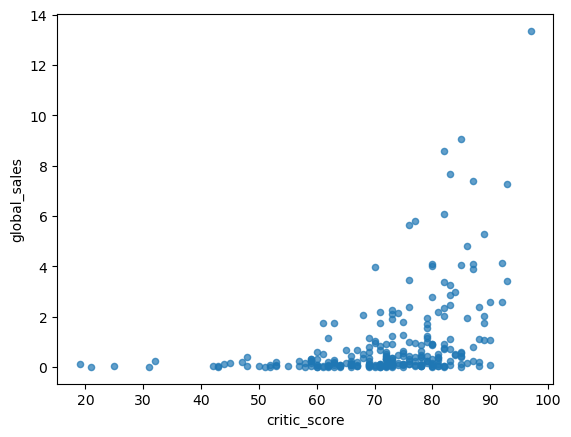

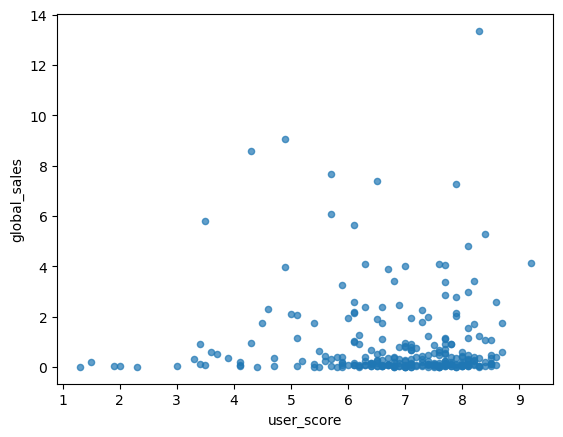

In [18]:
df_PS4_critic=df_actual.query('(platform == "PS4") & (critic_score != -1)')
df_PS4_user=df_actual.query('(platform == "PS4") & (user_score != -1)')

df_PS4_critic.plot(x='critic_score', y='global_sales', kind='scatter', alpha=0.7)
print(df_PS4_critic['global_sales'].corr(df_PS4_critic['critic_score']))

df_PS4_user.plot(x='user_score', y='global_sales', kind='scatter', alpha=0.7)
print(df_PS4_user['global_sales'].corr(df_PS4_user['user_score']))

0.4468840660889471
-0.05971729063892927


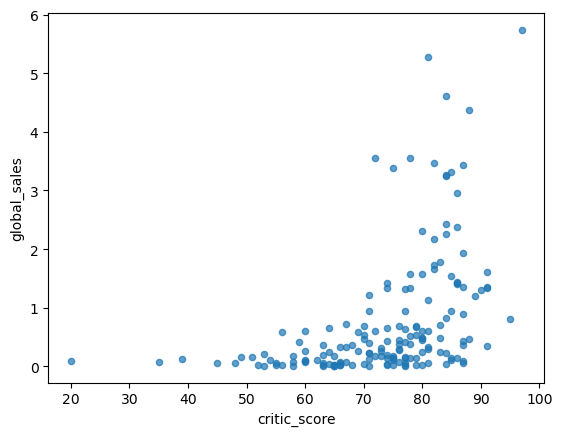

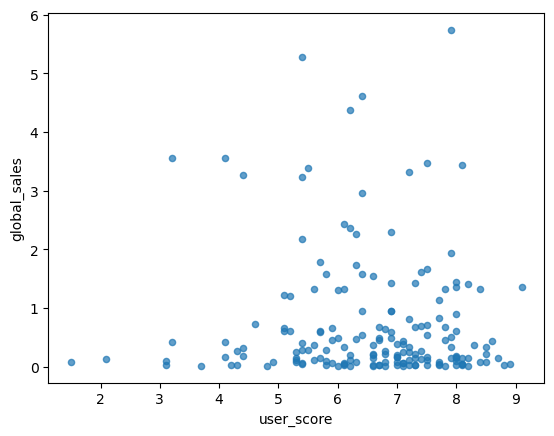

In [19]:
df_XOne_critic=df_actual.query('(platform == "XOne") & (critic_score != -1)')
df_XOne_user=df_actual.query('(platform == "XOne") & (user_score != -1)')

df_XOne_critic.plot(x='critic_score', y='global_sales', kind='scatter', alpha=0.7)
print(df_XOne_critic['global_sales'].corr(df_XOne_critic['critic_score']))

df_XOne_user.plot(x='user_score', y='global_sales', kind='scatter', alpha=0.7)
print(df_XOne_user['global_sales'].corr(df_XOne_user['user_score']))

<div style="border:solid steelblue 1px; padding: 20px">
Как видно картина для лпатформ PS4 и XOne не сильно изменилась т.е.<br />
В результате нами были установлено, что: <br />
1) Оценки критиков демонстрируют прямую, слабую корреляцию с продажами.<br />
2) Оценки пользователей демонстрируют обратную, очень слабую корреляцию с продажами т.е. оценки пользователей корреляции с продажами практически не имеют<br />

## ПРТРЕТ ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА

In [20]:
region=['na_sales','eu_sales','jp_sales']
for i in region:
    print()
    print(f'регион: {i}')
    sum_region=df_actual[i].sum()
    df_actual_p=df_actual.groupby(by=['platform'])[i].agg(['sum']).sort_values(by='sum', ascending=False)
    df_actual_p['ratio']=df_actual_p['sum']/sum_region
    display(df_actual_p.head())
    df_actual_g=df_actual.groupby(by=['genre'])[i].agg(['sum']).sort_values(by='sum', ascending=False)
    df_actual_g['ratio']=df_actual_g['sum']/sum_region
    display(df_actual_g.head())
#блок для анализа рейтинга и его влияния    
    df_actual_r=df_actual.groupby(by=['rating'])[i].agg(['sum']).sort_values(by='sum', ascending=False)
    df_actual_r['ratio']=df_actual_r['sum']/sum_region
    display(df_actual_r.head())
    df_actual_p1=df_actual.groupby(by=['platform','rating'])[i].agg(['sum']).sort_values(by='sum', ascending=False)
    df_actual_g1=df_actual.groupby(by=['genre','rating'])[i].agg(['sum']).sort_values(by='sum', ascending=False)
    display(df_actual_p1.head(8))
    display(df_actual_g1.head(8))
    print('--------------------------------------------')


регион: na_sales


,sum,ratio
platform,,
PS4,108.74,0.349242
XOne,91.01,0.292298
X360,29.46,0.094617
3DS,25.94,0.083312
PS3,22.76,0.073099


,sum,ratio
genre,,
Shooter,86.40,0.277492
Action,78.06,0.250707
Sports,49.70,0.159622
Role-Playing,38.89,0.124904
Misc,17.05,0.054760


,sum,ratio
rating,,
M,105.01,0.337262
NOT!,70.59,0.226715
E,55.04,0.176773
T,44.59,0.143210
E10+,36.13,0.116039


sum
platform rating       
XOne     M       43.11
PS4      M       41.02
         NOT!    24.58
         T       19.94
3DS      NOT!    15.98
PS4      E       15.81
XOne     NOT!    15.51
         E       12.63

sum
genre        rating       
Shooter      M       45.94
Action       M       38.32
Sports       E       36.88
Shooter      NOT!    19.40
             T       17.34
Role-Playing NOT!    17.12
Action       E10+    15.01
Role-Playing M       14.89

--------------------------------------------

регион: eu_sales


,sum,ratio
platform,,
PS4,140.21,0.479318
XOne,49.31,0.168570
PS3,26.53,0.090695
PC,20.08,0.068645
3DS,19.08,0.065226


,sum,ratio
genre,,
Action,79.91,0.273178
Shooter,69.63,0.238035
Sports,48.82,0.166895
Role-Playing,32.35,0.110591
Racing,14.88,0.050868


,sum,ratio
rating,,
M,100.03,0.341960
NOT!,63.41,0.216772
E,62.09,0.212259
T,38.24,0.130726
E10+,28.71,0.098147


sum
platform rating       
PS4      M       57.16
         NOT!    28.31
         E       26.84
XOne     M       22.47
PS4      T       21.22
3DS      NOT!    11.23
XOne     E        9.38
         NOT!     8.43

sum
genre        rating       
Action       M       41.97
Sports       E       41.53
Shooter      M       38.24
             NOT!    16.54
Role-Playing M       15.05
Action       E10+    14.37
             NOT!    13.88
Role-Playing NOT!    12.05

--------------------------------------------

регион: jp_sales


,sum,ratio
platform,,
3DS,46.67,0.467307
PS4,17.16,0.171823
PSV,15.95,0.159708
PS3,11.53,0.115450
WiiU,7.55,0.075598


,sum,ratio
genre,,
Role-Playing,33.53,0.335736
Action,31.60,0.316411
Fighting,6.57,0.065786
Misc,5.95,0.059577
Shooter,5.07,0.050766


,sum,ratio
rating,,
NOT!,61.46,0.615400
T,16.14,0.161610
E,9.20,0.092120
M,8.39,0.084009
E10+,4.68,0.046861


sum
platform rating       
3DS      NOT!    35.45
PSV      NOT!    10.55
PS4      NOT!     6.90
PS3      NOT!     6.32
PS4      M        5.17
3DS      T        4.64
         E        4.18
PSV      T        4.14

,,sum
genre,rating,
Role-Playing,NOT!,21.51
Action,NOT!,21.50
Role-Playing,T,9.11
Fighting,NOT!,4.59
Action,M,4.54
Misc,NOT!,4.51
Adventure,NOT!,3.95
Action,T,3.55


--------------------------------------------


<div style="border:solid steelblue 1px; padding: 20px">
На основе полученных данныхможно сделать следующие выводы:<br />
В Северной америке и Европе лидирут игры с рейтингом M (~34% от всей выручки региона). В Японии лидируют игры без рейтинга (61% рынка).<br /> 
В Северной Америке:<br /> 
Лидирует плптформа PS4, которая занимает почти 35% рынка, а самый популярный жанр Shooter, он занимает 28% всей выручки<br /> 
В Европе:<br /> 
Лидирует плптформа PS4, которая занимает 48% рынка, а самый популярный жанр Action, он занимает 27% всей выручки<br /> 
В Японии:<br /> 
Лидируют плптформа 3DS, которая занимает примерно 47% рынка, а самый популярный жанр Role-Playing, он занимает 33% всей выручки<br /> 

## ПОСТРОЕНИЕ МОДЕЛЕЙ ДЛЯ ПРЕДСКАЗАНИЯ ПРОДАЖ В СЕВЕРНОЙ АМЕРИКЕ

<div style="border:solid steelblue 1px; padding: 20px">
    Для обучения модели заменим "заглушки"(т.е. значения -1) на медианные в каждом жанре 

In [21]:
def inputation(df_actual):
    for i in df_actual['genre'].unique():
        df_actual.loc[(df_actual['genre'] == i) & (df_actual['critic_score']==-1), 'critic_score'] = round(df_actual['critic_score'].median(), 0)
        df_actual.loc[(df_actual['genre'] == i) & (df_actual['critic_count']==-1), 'critic_count'] = round(df_actual['critic_count'].median(), 0)
        df_actual.loc[(df_actual['genre'] == i) & (df_actual['user_score']==-1), 'user_score'] = round(df_actual['user_score'].median(), 0)
        df_actual.loc[(df_actual['genre'] == i) & (df_actual['user_count']==-1), 'user_count'] = round(df_actual['user_count'].median(), 0)

In [22]:
inputation(df_actual)

<div style="border:solid steelblue 1px; padding: 20px">
    Разделим на обучающую и тестовую выборки

In [23]:
df_train, df_test = train_test_split(df_actual, test_size=0.25, random_state=42)

In [24]:
df_train.shape, df_test.shape

((1436, 15), (479, 15))

<div style="border:solid steelblue 1px; padding: 20px">
Для избежания переобучения уберем из наших данных информацию по всем регионам кроме северной америке(её мы будем предсказывать)

In [25]:
Y_train =df_train['na_sales'] 
Y_test = df_test['na_sales']
X_train = df_train.drop(['na_sales','eu_sales','jp_sales','other_sales','global_sales'],axis=1)
X_test = df_test.drop(['na_sales','eu_sales','jp_sales','other_sales','global_sales'],axis=1)

In [26]:
X_train.head()

,name,platform,year_of_release,genre,Publisher,critic_score,critic_count,user_score,user_count,rating
1387,Touhou Genso Rondo: Bullet Ballet,PS4,2016,Shooter,Nippon Ichi Software,55,19,4.7,34,E10+
1874,Dark Parables: The Little Mermaid and the Purp...,PC,2016,Adventure,Astragon,-1,-1,-1.0,-1,NOT!
543,One Piece: Pirate Warriors 3,PS3,2015,Action,Namco Bandai Games,-1,-1,3.7,7,T
478,Metro: Last Light,XOne,2014,Action,Deep Silver,-1,-1,-1.0,-1,NOT!
741,F1 2016 (Codemasters),XOne,2016,Racing,Codemasters,-1,-1,-1.0,-1,NOT!


<div style="border:solid steelblue 1px; padding: 20px">
Выделим категориальные признаки

In [27]:
cat_columns = list(X_train.select_dtypes('object').columns)

In [28]:
cat_columns

['name', 'platform', 'genre', 'Publisher', 'rating']

In [29]:
def model_learning(model, parameters):
    cv = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
    grid_model = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=cv, verbose=3)
    grid_model.fit(features_train, target_train)
    print('Лучшая оценка на валидации: ', grid_model.best_score_)
    print('Лучшие гиперпараметры модели на валидации: ', grid_model.best_params_)
    print('Лучшая модель: ', grid_model.best_estimator_)
    return grid_model.best_estimator_

In [30]:
def test_scoring(model, X_test1, Y_test1):
    pred_test = model.predict(X_test1)
    print('Accuracy: ', round(model.score(X_test1, Y_test1), 3))
    print('MSE: ', round(mean_squared_error(Y_test1,pred_test), 3))

<div style="border:solid steelblue 1px; padding: 20px">
CatBoost

In [31]:
%%time

features_train=X_train
target_train=Y_train

CatBoost_reg = CatBoostRegressor(random_state=42, verbose=0, cat_features=cat_columns)
CatBoost_reg_param = {'n_estimators': [300, 500],
                      'learning_rate': [0.1, 1],
                      'max_depth': [1, 5],
                      'l2_leaf_reg': [1, 3]}

CatBoost_fitted = model_learning(CatBoost_reg, CatBoost_reg_param)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END l2_leaf_reg=1, learning_rate=0.1, max_depth=1, n_estimators=300;, score=-0.172 total time=   2.6s
[CV 2/3] END l2_leaf_reg=1, learning_rate=0.1, max_depth=1, n_estimators=300;, score=-0.304 total time=   2.4s
[CV 3/3] END l2_leaf_reg=1, learning_rate=0.1, max_depth=1, n_estimators=300;, score=-0.137 total time=   2.1s
[CV 1/3] END l2_leaf_reg=1, learning_rate=0.1, max_depth=1, n_estimators=500;, score=-0.170 total time=   3.5s
[CV 2/3] END l2_leaf_reg=1, learning_rate=0.1, max_depth=1, n_estimators=500;, score=-0.302 total time=   3.9s
[CV 3/3] END l2_leaf_reg=1, learning_rate=0.1, max_depth=1, n_estimators=500;, score=-0.136 total time=   5.4s
[CV 1/3] END l2_leaf_reg=1, learning_rate=0.1, max_depth=5, n_estimators=300;, score=-0.164 total time=  16.6s
[CV 2/3] END l2_leaf_reg=1, learning_rate=0.1, max_depth=5, n_estimators=300;, score=-0.246 total time=  12.7s
[CV 3/3] END l2_leaf_reg=1, learning_rate=0.1, max_

In [32]:
test_scoring(CatBoost_fitted, X_test, Y_test)

Accuracy:  0.532
MSE:  0.046


<div style="border:solid steelblue 1px; padding: 20px">
    Random Forest

<div style="border:solid steelblue 1px; padding: 20px">
Чтобы преобразовать категориальные признаки в численные поможет техника Ordinal (для модели Случайный лес)

In [33]:
encoder = OrdinalEncoder()
features_train_f=X_train.copy()
features_test_f=X_test.copy()
target_train_f=Y_train.copy()

features_train_f.loc[:,cat_columns] = encoder.fit_transform(features_train_f.loc[:, cat_columns]).astype('int64')
features_test_f.loc[:, cat_columns] = encoder.fit_transform(features_test_f.loc[:, cat_columns]).astype('int64')
features_train_f.head(10)

,name,platform,year_of_release,genre,Publisher,critic_score,critic_count,user_score,user_count,rating
1387,847,4,2016,8,91,55,19,4.7,34,1
1874,136,2,2016,1,14,-1,-1,-1.0,-1,3
543,559,3,2015,0,85,-1,-1,3.7,7,4
478,482,10,2014,0,33,-1,-1,-1.0,-1,3
741,236,10,2016,6,27,-1,-1,-1.0,-1,3
1242,29,6,2014,1,63,-1,-1,-1.0,-1,3
774,830,2,2016,8,38,86,29,8.1,541,2
1449,143,10,2016,0,25,-1,-1,8.8,13,2
1177,103,0,2016,3,45,-1,-1,-1.0,-1,3
519,421,4,2016,0,136,73,17,8.1,7,1


In [34]:
%%time

features_train=features_train_f
target_train=target_train_f

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_param = {'n_estimators': [300, 500, 1000],
            'max_depth': [None, 10, 20],
            'min_samples_leaf': np.arange(1, 6, 2),
            'min_samples_split': np.arange(2, 7, 2)}

rf_fitted = model_learning(rf, rf_param)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.174 total time=   6.8s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.289 total time=   0.7s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.125 total time=   0.7s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-0.178 total time=   1.1s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-0.287 total time=   1.0s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-0.124 total time=   1.0s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=-0.175 total time=   2.5s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, 

[CV 3/3] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=500;, score=-0.131 total time=   0.8s
[CV 1/3] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000;, score=-0.151 total time=   1.7s
[CV 2/3] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000;, score=-0.296 total time=   1.6s
[CV 3/3] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000;, score=-0.130 total time=   1.6s
[CV 1/3] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=-0.152 total time=   0.6s
[CV 2/3] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=-0.298 total time=   0.5s
[CV 3/3] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=-0.133 total time=   0.6s
[CV 1/3] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=500;, score=-0.151 total time=   1.0s
[CV 2/3] END max_depth=None, 

[CV 3/3] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=-0.133 total time=   0.5s
[CV 1/3] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=-0.151 total time=   1.0s
[CV 2/3] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=-0.297 total time=   1.0s
[CV 3/3] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=-0.131 total time=   0.9s
[CV 1/3] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=-0.151 total time=   1.9s
[CV 2/3] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=-0.297 total time=   1.7s
[CV 3/3] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=-0.130 total time=   1.7s
[CV 1/3] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=-0.152 total time=   0.5s
[CV 2/3] END max_depth=10, min_samples_leaf=5

[CV 3/3] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=1000;, score=-0.124 total time=   2.0s
[CV 1/3] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=-0.153 total time=   0.6s
[CV 2/3] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=-0.292 total time=   0.6s
[CV 3/3] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=-0.128 total time=   0.6s
[CV 1/3] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=500;, score=-0.152 total time=   1.0s
[CV 2/3] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=500;, score=-0.291 total time=   0.9s
[CV 3/3] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=500;, score=-0.126 total time=   0.8s
[CV 1/3] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=1000;, score=-0.152 total time=   1.7s
[CV 2/3] END max_depth=20, min_samples_leaf=3,

<div style="border:solid steelblue 1px; padding: 20px">
    Модель CatBoost оказалась лучше. Выведем финальную метрику для тестовой выборки

In [35]:
test_scoring(CatBoost_fitted, X_test, Y_test)

Accuracy:  0.532
MSE:  0.046


<div style="border:solid steelblue 1px; padding: 20px">
    Выведем значимость признаков

Text(0.5, 1.0, 'Feature Importance')

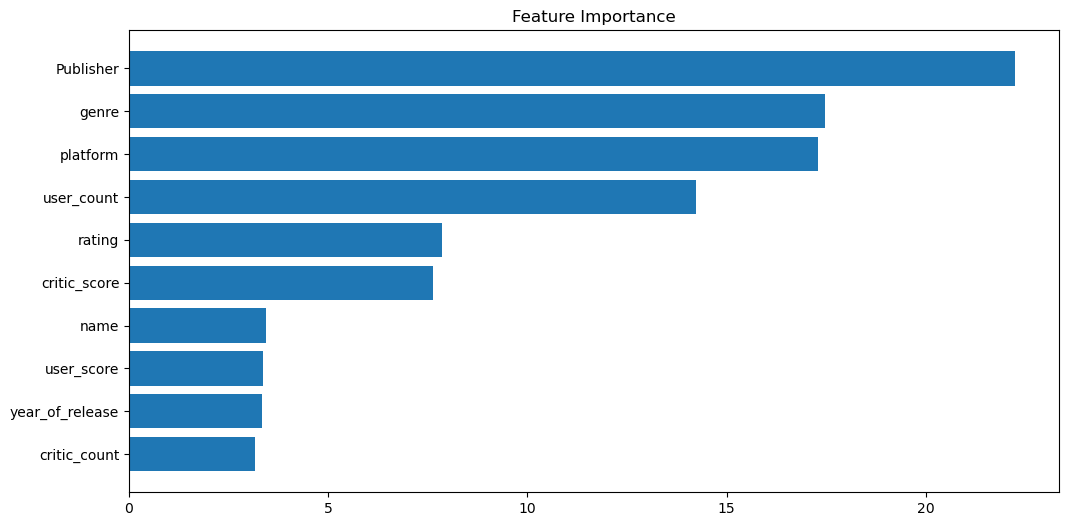

In [36]:
feature_importance = CatBoost_fitted.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

## ВЫВОДЫ

<div style="border:solid steelblue 1px; padding: 20px">
<b>В результате работы:<br /></b>
    <br />
    Были проанализированы и исправленны входные данные<br />
    Отметим, что максимальное число пропусков содержится в столбце с оценкой критиков (более 50%).<br />
    Наличие пропусков может быть связано:<br />
    1) Механическая ошибка/сбой ситемы<br />
    2) Данных чисто физически нет. Напимер: очень старая игра, или не было опросов относительно неё<br />
    3) Рейтинг выставляет американская служба и она не смогла/не было необходимости проанализировать игру<br />
<br />
    Был произведен анализ данных:<br />
    * проанализировано число продаж:<br />
     число продаж резко увеличилось начиная где-то с 2003 года. Максимальное число продаж пришлось на 2007 год.<br />
    <br />
    * проанализировна выручка по годам для платформ с наибольшими суммарными продажами;<br /> 
    * выявлен средний срок жизни платформы(вывод сделан на основе самых успешных платформ). Выбран актуальный период:<br />
Средний срок жизни платформы где то 10-11 лет. Пик продаж приходится примерно на середину цикла жизни платформы. Анализируемая индустрия быстро развивается поэтому возьмем актуальный период в 3 года.<br />
    <br />
    * исходя из актуального периода были выбраны самые перспективные платформы и наооборот:<br />
По продажам лидируют платформы PS4, XOne, 3DS. Платформы такие как PS4 и XOne растут и потенциально прибыльные. Продажи по таким платформам как PC,Wii,PS3,X360,PSV  и т.д. убывают<br />
    <br />
    * рассмотрена корреляция зависимости продажи игр от оценок экспертов и пользователей:<br />
Оценки критиков демонстрируют прямую, слабую корреляцию с продажами.<br />
Оценки пользователей демонстрируют обратную, очень слабую корреляцию с продажами т.е. оценки пользователей корреляции с продажами практически не имеют<br />
    <br />
    * рассмотрены предпочтения пользователей по регионам:<br />
На основе полученных данныхможно сделать следующие выводы:<br />
В Северной америке и Европе лидирут игры с рейтингом M (~34% от всей выручки региона). В Японии лидируют игры без рейтинга (61% рынка).<br /> 
В Северной Америке:<br /> 
Лидирует плптформа PS4, которая занимает почти 35% рынка, а самый популярный жанр Shooter, он занимает 28% всей выручки<br /> 
В Европе:<br /> 
Лидирует плптформа PS4, которая занимает 48% рынка, а самый популярный жанр Action, он занимает 27% всей выручки<br /> 
В Японии:<br /> 
Лидируют плптформа 3DS, которая занимает примерно 47% рынка, а самый популярный жанр Role-Playing, он занимает 33% всей выручки<br /> 
    <br />
    * Разработаны модели для предсказания продаж в Северной Америке<br />
    
На основе выше сказанного рекомендутся инвестировать в лидирующие платформы и жанры за актуальный период в соответствии с регионом(см выше).